In [2]:
# ===================================================================
# 模块一：全局初始化 (Global Initialization)
# ===================================================================

# 导入所有可能用到的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
import pulp
# ... import other libraries as needed

# 全局美化设置
plt.rcParams['font.sans-serif'] = ['SimHei'] # 解决中文显示问题
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
sns.set_style('whitegrid') # 设置图表风格
warnings.filterwarnings("ignore", category=UserWarning)
print("✅ 指挥中心已启动，所有库准备就绪！(警告过滤器已开启)")

✅ 指挥中心已启动，所有库准备就绪！(警告过滤器已开启)


In [3]:
# --- 🔴 请在这里修改文件名 ---
file_path_1 = r'C:\Users\俊宇\Desktop\国赛\2025\C题\附件.xlsx'
# file_path_3 = "..." # 如果有更多文件，在此处添加

try:
    # 尝试用Pandas读取数据，你的主要武器是pd.read_excel()和pd.read_csv()
    df1 = pd.read_excel(file_path_1)
   
    print("✅ 所有附件数据加载成功！")
    
    print("\n--- 附件1 数据预览 (前5行) ---")
    display(df1.head())

except FileNotFoundError as e:
    print(f"❌ 文件未找到，请仔细检查文件名和路径是否完全正确: {e}")
except Exception as e:
    print(f"❌ 数据加载失败，可能是编码问题或其他错误: {e}")

✅ 所有附件数据加载成功！

--- 附件1 数据预览 (前5行) ---


,序号,孕妇代码,年龄,身高,体重,末次月经,IVF妊娠,检测日期,检测抽血次数,检测孕周,...,Unnamed: 21,X染色体浓度,13号染色体的GC含量,18号染色体的GC含量,21号染色体的GC含量,被过滤掉读段数的比例,染色体的非整倍体,怀孕次数,生产次数,胎儿是否健康
0,1,B001,32,162.0,82.0,2023-08-06 00:00:00,自然受孕,20231119,1,13w+5,...,NaN,-0.016976,0.379614,0.392832,0.402970,0.024708,NaN,1,0,是
1,2,B001,32,162.0,82.0,2023-08-06 00:00:00,自然受孕,20231208,2,17w+1,...,NaN,-0.024409,0.377950,0.391176,0.399509,0.025608,NaN,1,0,是
2,3,B001,32,162.0,85.0,2023-08-06 00:00:00,自然受孕,20240101,3,19w+6,...,NaN,-0.016357,0.385021,0.397515,0.408611,0.024452,NaN,1,0,是
3,4,B001,32,162.0,86.0,2023-08-06 00:00:00,自然受孕,20240123,4,23w,...,NaN,-0.021307,0.376070,0.389126,0.397539,0.022412,NaN,1,0,是
4,5,B002,33,165.0,96.0,2023-02-15 00:00:00,自然受孕,20230519,1,12w+5,...,NaN,-0.000886,0.378697,0.391196,0.401632,0.022843,NaN,1,0,是


In [4]:
# --- 2.1 检查数据集df1 ---
print("--- 🔬 [df1] 数据结构概览 (info) ---")
df1.info()
print("\n" + "="*50 + "\n")
print("--- 🔬 [df1] 数值型数据统计摘要 (describe) ---")
display(df1.describe())
print("\n" + "="*50 + "\n")
print("--- 🔬 [df1] 类别型数据统计摘要 (describe for objects) ---")
display(df1.describe(include=['object']))

--- 🔬 [df1] 数据结构概览 (info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   序号            605 non-null    int64  
 1   孕妇代码          605 non-null    object 
 2   年龄            605 non-null    int64  
 3   身高            605 non-null    float64
 4   体重            605 non-null    float64
 5   末次月经          605 non-null    object 
 6   IVF妊娠         605 non-null    object 
 7   检测日期          605 non-null    int64  
 8   检测抽血次数        605 non-null    int64  
 9   检测孕周          605 non-null    object 
 10  孕妇BMI         604 non-null    float64
 11  原始读段数         605 non-null    int64  
 12  在参考基因组上比对的比例  605 non-null    float64
 13  重复读段的比例       605 non-null    float64
 14  唯一比对的读段数      605 non-null    int64  
 15  GC含量          605 non-null    float64
 16  13号染色体的Z值     605 non-null    float64
 17  18号染色体的Z值     605 non-null    float64
 18  

,序号,年龄,身高,体重,检测日期,检测抽血次数,孕妇BMI,原始读段数,在参考基因组上比对的比例,重复读段的比例,...,21号染色体的Z值,X染色体的Z值,Unnamed: 20,Unnamed: 21,X染色体浓度,13号染色体的GC含量,18号染色体的GC含量,21号染色体的GC含量,被过滤掉读段数的比例,生产次数
count,605.000000,605.000000,605.000000,605.000000,6.050000e+02,605.000000,604.000000,6.050000e+02,605.000000,605.000000,...,605.000000,605.000000,0.0,0.0,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000
mean,303.000000,30.018182,161.312727,83.816347,2.023301e+07,2.472727,32.162413,4.711222e+06,0.795775,0.030406,...,-0.117443,0.477222,NaN,NaN,-0.006851,0.379080,0.391949,0.401231,0.023593,0.421488
std,174.792734,4.309008,5.204238,9.563546,4.030565e+03,1.123794,2.954136,9.978002e+05,0.017730,0.003354,...,1.124955,1.300521,NaN,NaN,0.017998,0.004388,0.004184,0.005045,0.009407,0.539071
min,1.000000,19.000000,135.000000,56.000000,2.023030e+07,1.000000,25.593737,2.028749e+06,0.673715,0.010142,...,-4.255845,-8.298998,NaN,NaN,-0.070048,0.350101,0.361057,0.364673,0.016273,0.000000
25%,152.000000,27.000000,158.000000,77.000000,2.023061e+07,1.000000,30.108661,4.097391e+06,0.791471,0.028519,...,-0.824381,-0.339566,NaN,NaN,-0.018147,0.377120,0.390101,0.398746,0.020781,0.000000
50%,303.000000,30.000000,161.500000,82.000000,2.023082e+07,2.000000,31.475281,4.587760e+06,0.801418,0.030239,...,-0.141454,0.527573,NaN,NaN,-0.007789,0.378913,0.391897,0.401257,0.022705,0.000000
75%,454.000000,32.000000,165.000000,90.000000,2.023122e+07,3.000000,33.357611,5.205392e+06,0.806022,0.031903,...,0.688026,1.245971,NaN,NaN,0.004888,0.380653,0.393643,0.403483,0.024893,1.000000
max,605.000000,44.000000,173.000000,121.000000,2.024071e+07,5.000000,45.724737,1.354598e+07,0.815820,0.053685,...,2.662144,10.286123,NaN,NaN,0.120869,0.426437,0.433851,0.449964,0.185965,2.000000




--- 🔬 [df1] 类别型数据统计摘要 (describe for objects) ---


,孕妇代码,末次月经,IVF妊娠,检测孕周,染色体的非整倍体,怀孕次数,胎儿是否健康
count,605,605,605,605,67,605,605
unique,147,121,2,91,6,3,1
top,B066,2023-01-08 00:00:00,自然受孕,12w+2,T18,1,是
freq,9,15,597,25,33,238,605


--- 启动: 问题四 EDA 与图表生成 (终极版) ---
✅ 数据清洗和标签创建完成。

--- Step 2: Visualizing Class Imbalance ---


C:\Users\俊宇\AppData\Local\Temp\ipykernel_15140\3145984403.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=balance_report.index, y=balance_report.values, palette=['#4c72b0', '#c44e52']);


✅ figure_q4_class_imbalance.png has been exported.


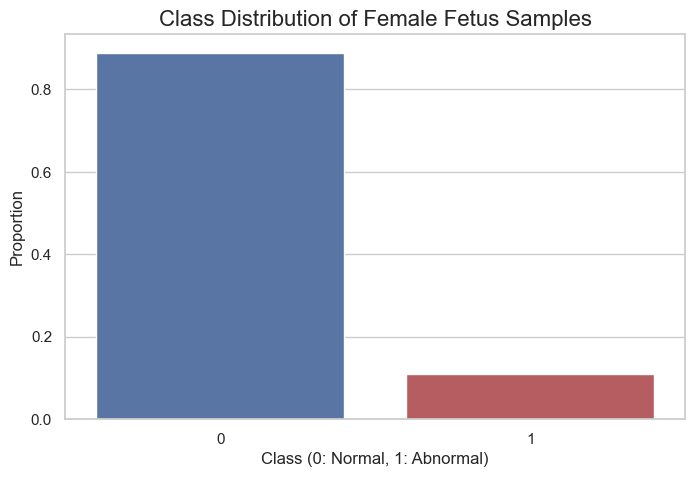


--- Step 3: Exploring Key Risk Indicators (Z-Scores) ---


C:\Users\俊宇\AppData\Local\Temp\ipykernel_15140\3145984403.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is_Abnormal', y=col, data=df_female, palette=['#4c72b0', '#c44e52']);


✅ figure_q4_boxplot_zscore_chr13.png has been exported.


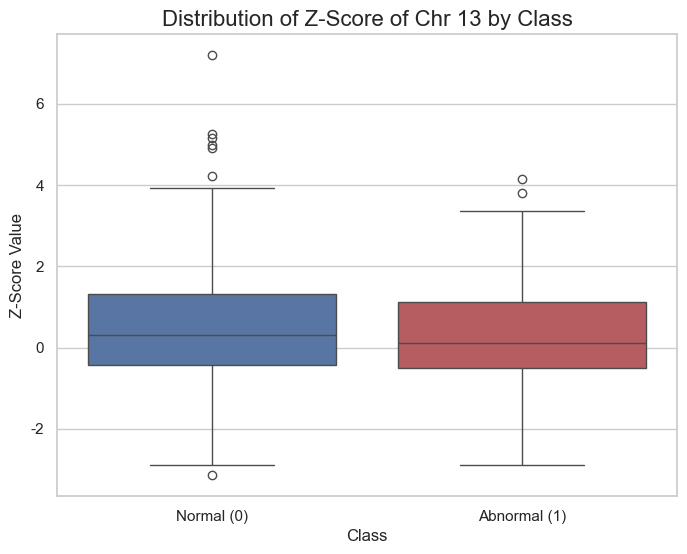

C:\Users\俊宇\AppData\Local\Temp\ipykernel_15140\3145984403.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is_Abnormal', y=col, data=df_female, palette=['#4c72b0', '#c44e52']);


✅ figure_q4_boxplot_zscore_chr18.png has been exported.


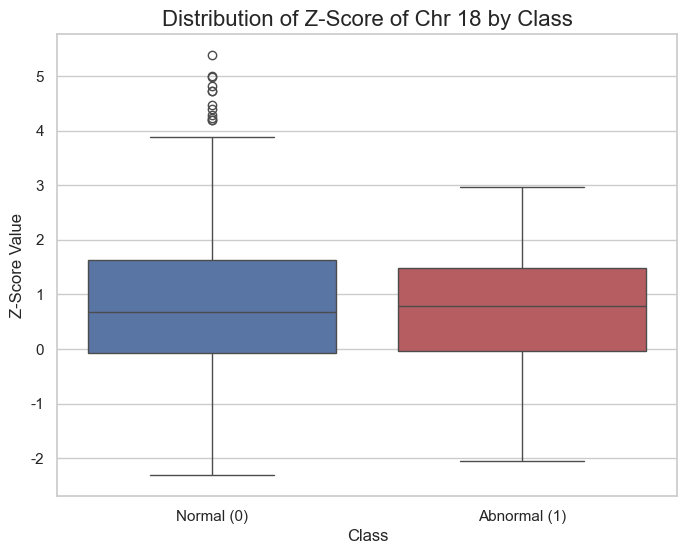

C:\Users\俊宇\AppData\Local\Temp\ipykernel_15140\3145984403.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is_Abnormal', y=col, data=df_female, palette=['#4c72b0', '#c44e52']);


✅ figure_q4_boxplot_zscore_chr21.png has been exported.


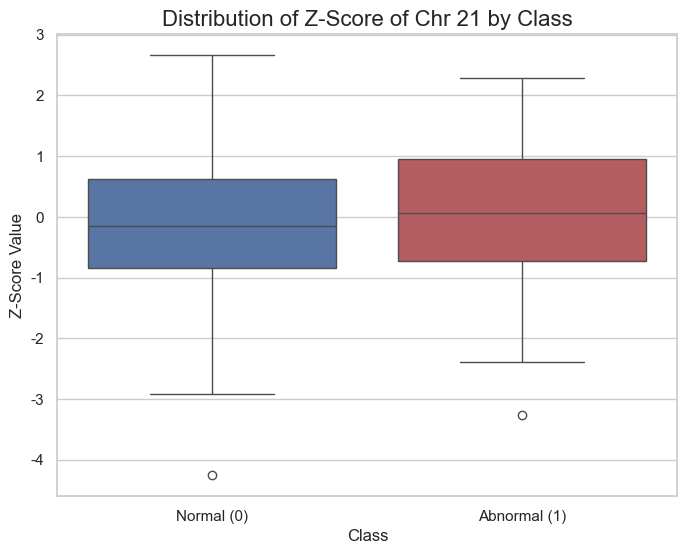


--- Step 4: Exploring Maternal Indicators (BMI) ---


C:\Users\俊宇\AppData\Local\Temp\ipykernel_15140\3145984403.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Is_Abnormal', y='孕妇BMI', data=df_female, palette=['#4c72b0', '#c44e52']);


✅ figure_q4_violinplot_bmi.png has been exported.


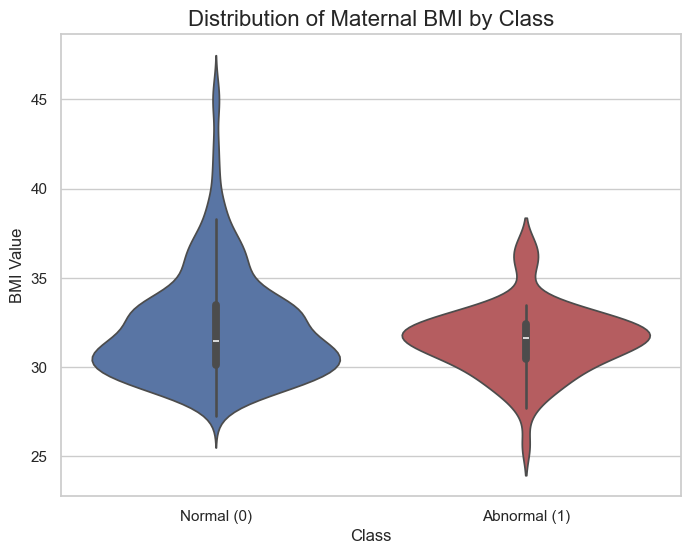


--- 步骤 5: 准备并导出最终建模数据 ---
✅ 最终用于问题四建模的数据已导出为: cleaned_female_for_modeling_v3.0.csv


In [7]:
# ======================================================================
# "揭示行动" V3.0 - EDA for Female Fetus Data (终极完整版)
# ======================================================================
# 这个单元格依赖于你在 [3] 号单元格中成功创建的 df1 变量

print("--- 启动: 问题四 EDA 与图表生成 (终极版) ---")

try:
    # --- 步骤 1: 基于 df1 进行数据清洗与准备 ---
    # 我们将创建一个新的DataFrame叫 df_female，以保持df1的原始状态
    df_female = df1.copy()

    # a. 筛选女胎样本 (如果df1中已包含男女胎)
    #    根据info()结果，df1已是女胎数据，但保留此逻辑以增强鲁棒性
    if 'Y染色体浓度' in df_female.columns:
        female_mask = df_female['Y染色体浓度'].isna()
        df_female = df_female[female_mask].copy()

    # b. 丢弃完全无用的列 (根据info())
    if 'Unnamed: 20' in df_female.columns:
        df_female = df_female.drop(columns=['Unnamed: 20'])
    
    # c. 转换孕周为天数
    def convert_weeks_to_days_robust(week_str):
        try:
            if not isinstance(week_str, str): return np.nan
            s = week_str.lower().strip()
            if '+' in s:
                w, d = s.replace('w', '').split('+'); return int(w) * 7 + int(d)
            else:
                return int(s.replace('w', '')) * 7
        except: return np.nan
        
    df_female['检测孕周_days'] = df_female['检测孕周'].apply(convert_weeks_to_days_robust)

    # d. 创建我们的核心真理标签
    df_female['Is_Abnormal'] = df_female['染色体的非整倍体'].notna().astype(int)
    print("✅ 数据清洗和标签创建完成。")


    # --- 步骤 2: 类别不平衡可视化 ---
    print("\n--- Step 2: Visualizing Class Imbalance ---")
    balance_report = df_female['Is_Abnormal'].value_counts(normalize=True)
    plt.figure(figsize=(8, 5)); 
    sns.barplot(x=balance_report.index, y=balance_report.values, palette=['#4c72b0', '#c44e52']);
    plt.title('Class Distribution of Female Fetus Samples', fontsize=16);
    plt.xlabel('Class (0: Normal, 1: Abnormal)', fontsize=12);
    plt.ylabel('Proportion', fontsize=12);
    plt.savefig('figure_q4_class_imbalance.png', dpi=300, bbox_inches='tight');
    print("✅ figure_q4_class_imbalance.png has been exported.");
    plt.show();


    # --- 步骤 3: 关键Z值 vs. 异常状态 ---
    print("\n--- Step 3: Exploring Key Risk Indicators (Z-Scores) ---")
    key_z_scores = ['13号染色体的Z值', '18号染色体的Z值', '21号染色体的Z值']
    english_z_score_names = ['Z-Score of Chr 13', 'Z-Score of Chr 18', 'Z-Score of Chr 21']
    
    for i, col in enumerate(key_z_scores):
        plt.figure(figsize=(8, 6));
        sns.boxplot(x='Is_Abnormal', y=col, data=df_female, palette=['#4c72b0', '#c44e52']);
        plt.title(f'Distribution of {english_z_score_names[i]} by Class', fontsize=16);
        plt.xlabel('Class', fontsize=12);
        plt.ylabel('Z-Score Value', fontsize=12);
        plt.xticks([0, 1], ['Normal (0)', 'Abnormal (1)']);
        output_filename = f'figure_q4_boxplot_zscore_chr{col.split("号")[0]}.png'
        plt.savefig(output_filename, dpi=300, bbox_inches='tight');
        print(f"✅ {output_filename} has been exported.");
        plt.show();

    # --- 步骤 4: BMI vs. 异常状态 ---
    print("\n--- Step 4: Exploring Maternal Indicators (BMI) ---")
    plt.figure(figsize=(8, 6));
    sns.violinplot(x='Is_Abnormal', y='孕妇BMI', data=df_female, palette=['#4c72b0', '#c44e52']);
    plt.title('Distribution of Maternal BMI by Class', fontsize=16);
    plt.xlabel('Class', fontsize=12);
    plt.ylabel('BMI Value', fontsize=12);
    plt.xticks([0, 1], ['Normal (0)', 'Abnormal (1)']);
    plt.savefig('figure_q4_violinplot_bmi.png', dpi=300, bbox_inches='tight');
    print("✅ figure_q4_violinplot_bmi.png has been exported.");
    plt.show();


    # --- 步骤 5: 准备最终建模数据 ---
    print("\n--- 步骤 5: 准备并导出最终建模数据 ---")
    feature_cols_final = [
        '年龄', '身高', '体重', '检测抽血次数', '检测孕周_days', '孕妇BMI',
        '原始读段数', '在参考基因组上比对的比例', '重复读段的比例', '唯一比对的读段数',
        'GC含量', '13号染色体的Z值', '18号染色体的Z值', '21号染色体的Z值', 'X染色体的Z值'
    ]
    # 清洗列名，以防万一
    df_female.columns = df_female.columns.str.strip()
    
    # 增加编码后的IVF特征
    df_female['IVF_encoded'] = (df_female['IVF妊娠'] != '自然受孕').astype(int)
    feature_cols_final.append('IVF_encoded')
    
    final_df_for_modeling = df_female[feature_cols_final + ['Is_Abnormal']].dropna().copy()
    output_final_data_filename = 'cleaned_female_for_modeling_v3.0.csv'
    final_df_for_modeling.to_csv(output_final_data_filename, index=False, encoding='utf-8-sig')
    print(f"✅ 最终用于问题四建模的数据已导出为: {output_final_data_filename}")


except NameError:
    print("❌ [错误] 找不到名为 'df1' 的DataFrame。请确保您已经成功运行了前面的数据加载单元格 [3]。")
except Exception as e:
    import traceback
    print(f"❌ 发生未知错误: {e}")
    traceback.print_exc()


--- 步骤3.1: 特征相关性热力图 ---


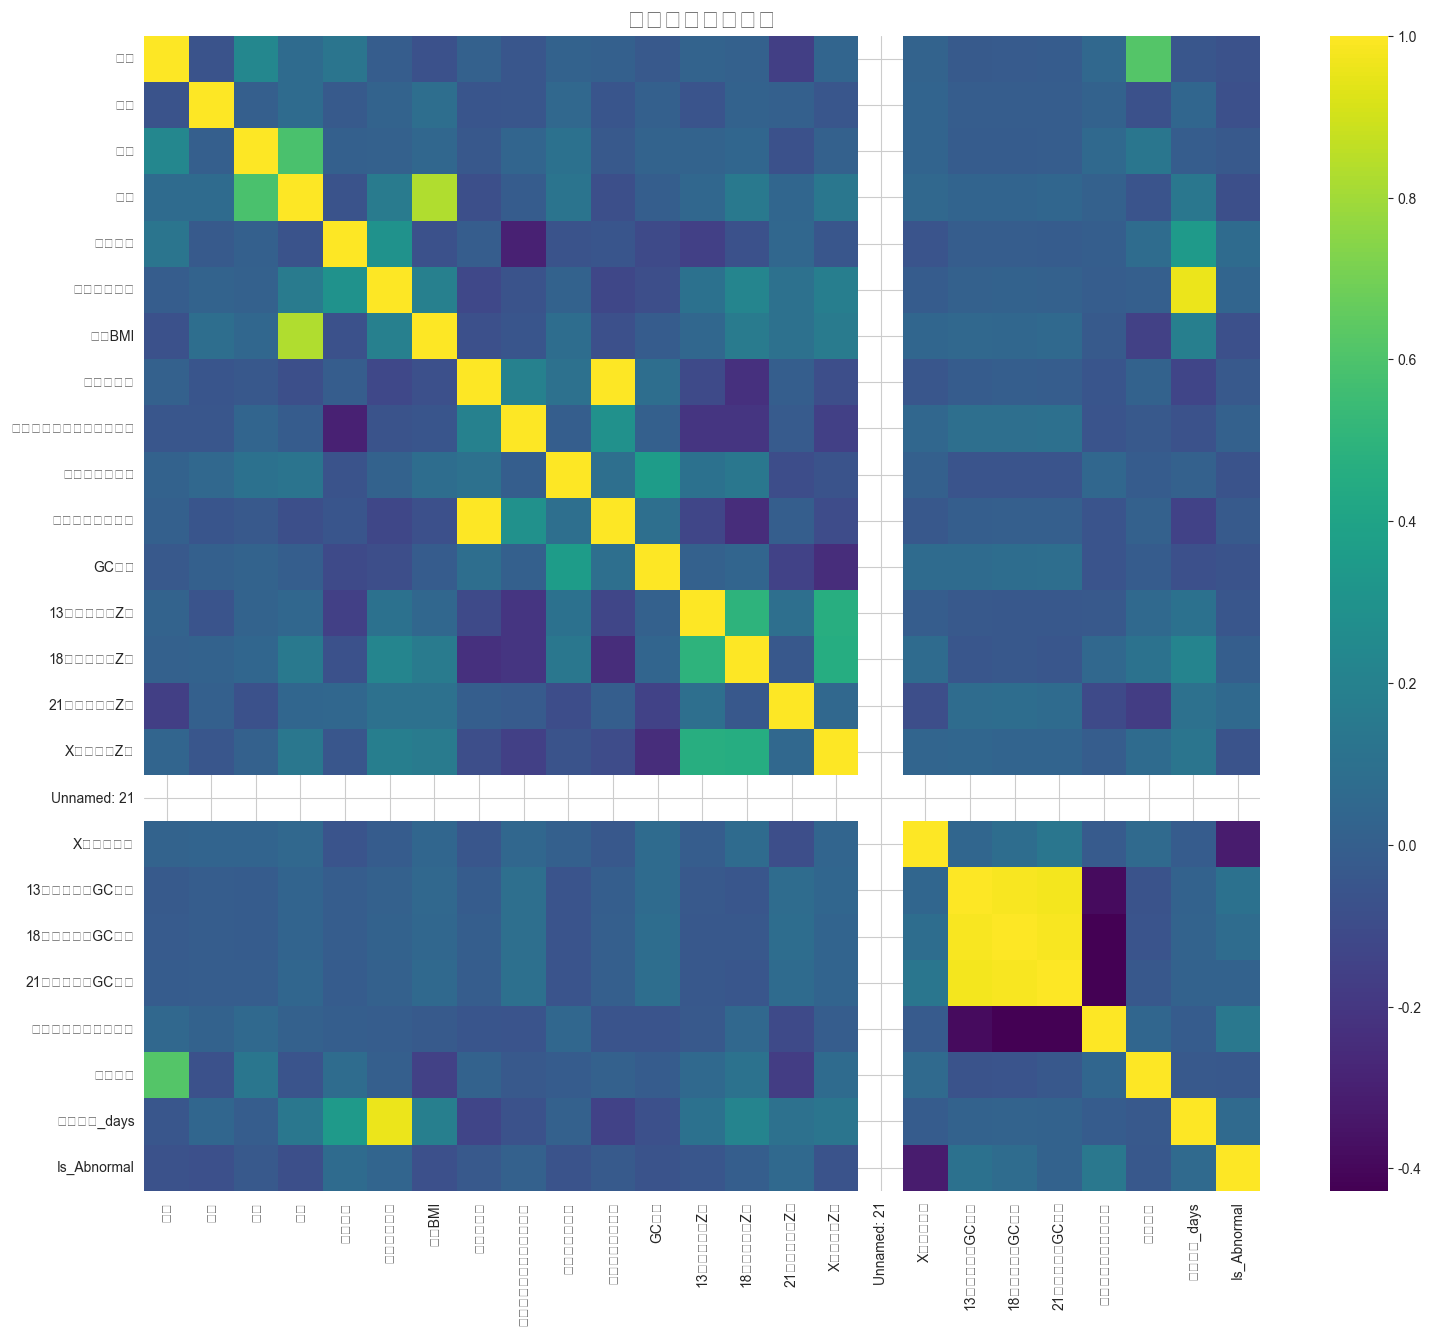

🎯 [洞察] 我们需要特别关注是否存在高度相关的特征对（颜色特别亮或特别暗的格子）。
   - 例如，'身高'和'体重'，'原始读段数'和'唯一比对的读段数'可能会有强相关性。
   - 这对于随机森林和XGBoost这类树模型影响不大，但如果是线性模型，就需要警惕共线性问题。

--- 步骤3.2: 处理分类特征 'IVF妊娠' ---
   - 'IVF妊娠' 列的原始取值: ['自然受孕' 'IVF（试管婴儿）']
✅ 'IVF妊娠' 列已成功编码为 'IVF_encoded'。
IVF_encoded
0    597
1      8
Name: count, dtype: int64

--- 步骤3.3: 创建启发式新特征 (可选) ---
✅ 新特征 'Z_Total_Abs_Deviation' 已创建。
   - 该特征汇总了13,18,21号染色体Z值的总偏离程度。


,Z_Total_Abs_Deviation,Is_Abnormal
0,1.763125,0
1,3.554785,0
2,2.965350,0
3,4.701335,0
4,1.289302,0


In [11]:
# ======================================================================
# MCM Copilot "启明" V1.0 | “净化行动” V2.0 - 第二阶段
# 核心任务: 深度清洗与特征工程
# ======================================================================

# --- 步骤 3.1: 相关性分析 ---
print("\n--- 步骤3.1: 特征相关性热力图 ---")
# 选取所有数值型特征进行相关性分析
numeric_cols = df_cleaned.select_dtypes(include=np.number).columns.tolist()

# 计算相关系数矩阵
corr_matrix = df_cleaned[numeric_cols].corr()

# 绘制热力图
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, annot=False, cmap='viridis') # annot=False,因为特征太多，数字会看不清
plt.title('特征相关性热力图', fontsize=18)
plt.show()

print("🎯 [洞察] 我们需要特别关注是否存在高度相关的特征对（颜色特别亮或特别暗的格子）。")
print("   - 例如，'身高'和'体重'，'原始读段数'和'唯一比对的读段数'可能会有强相关性。")
print("   - 这对于随机森林和XGBoost这类树模型影响不大，但如果是线性模型，就需要警惕共线性问题。")

# --- 步骤 3.2: 处理分类特征 ---
print("\n--- 步骤3.2: 处理分类特征 'IVF妊娠' ---")
# 使用标签编码将文本转换为0/1
# 假设'自然受孕'为0, 'IVF'为1 (或其他非自然方式)
# 注意：我们需要先查看这一列的具体取值
print(f"   - 'IVF妊娠' 列的原始取值: {df_cleaned['IVF妊娠'].unique()}")

# 根据实际取值进行编码，这里假设只有'自然受孕'和非'自然受孕'两种
df_cleaned['IVF_encoded'] = (df_cleaned['IVF妊娠'] != '自然受孕').astype(int)

# 丢弃原始的文本列，保留编码后的数值列
df_cleaned = df_cleaned.drop(columns=['IVF妊娠'])

print(f"✅ 'IVF妊娠' 列已成功编码为 'IVF_encoded'。")
print(df_cleaned['IVF_encoded'].value_counts())

# --- 步骤 3.3: (可选加分项) 创建新特征 ---
print("\n--- 步骤3.3: 创建启发式新特征 (可选) ---")
# 基于我们的洞察，Z值的极端程度是关键信号。
# 我们可以创建一个新特征来量化“总体Z值偏离度”

# 我们只使用最关键的三个染色体Z值
key_z_scores = ['13号染色体的Z值', '18号染色体的Z值', '21号染色体的Z值']
df_cleaned['Z_Total_Abs_Deviation'] = df_cleaned[key_z_scores].abs().sum(axis=1)

print("✅ 新特征 'Z_Total_Abs_Deviation' 已创建。")
print("   - 该特征汇总了13,18,21号染色体Z值的总偏离程度。")
display(df_cleaned[['Z_Total_Abs_Deviation', 'Is_Abnormal']].head())

In [12]:
# --- 步骤 4.1: 最终特征选择 ---
print("\n--- 步骤4: 最终产出 ---")

# 从处理好的 df_cleaned 中，选取最终用于建模的所有特征列
feature_cols_final = [
    '年龄', '身高', '体重', '检测抽血次数', '检测孕周_days', '孕妇BMI',
    '原始读段数', '在参考基因组上比对的比例', '重复读段的比例', '唯一比对的读段数',
    'GC含量', '13号染色体的Z值', '18号染色体的Z值', '21号染色体的Z值', 'X染色体的Z值',
    'IVF_encoded',             # <-- 新加入的编码特征
    'Z_Total_Abs_Deviation'    # <-- 新加入的组合特征
]

# 我们的目标列名
target_col_final = 'Is_Abnormal'

# --- 步骤 4.2: 最后一次清洗与对齐 ---
# 基于最终选择的特征列和目标列，进行最后一次缺失值处理，确保X和y完美对齐
final_df = df_cleaned[feature_cols_final + [target_col_final]].dropna().copy()

X_female_final = final_df[feature_cols_final]
y_female_final = final_df[target_col_final]

# --- 步骤 4.3: 保存最终产出 ---
output_filename = 'cleaned_female_with_labels_and_features_v2.0.csv'
final_df.to_csv(output_filename, index=False, encoding='utf-8-sig')

print(f"✅ [净化行动完成]！")
print(f"   - 最终用于建模的特征矩阵 X ({X_female_final.shape[0]}行) 和目标向量 y ({y_female_final.shape[0]}行) 已准备就绪。")
print(f"💾 最终数据已保存为 '{output_filename}'。")


--- 步骤4: 最终产出 ---
✅ [净化行动完成]！
   - 最终用于建模的特征矩阵 X (604行) 和目标向量 y (604行) 已准备就绪。
💾 最终数据已保存为 'cleaned_female_with_labels_and_features_v2.0.csv'。


--- 启动: 问题四 混淆矩阵对比图生成 ---
✅ 数据加载与划分完成。
✅ 方案B (SMOTE + RF) 混淆矩阵已生成。
✅ 方案C (Logistic Regression) 混淆矩阵已生成。

💾 [导出成功] 对比图已成功保存为 'figure_q4_confusion_matrix_comparison.png'。


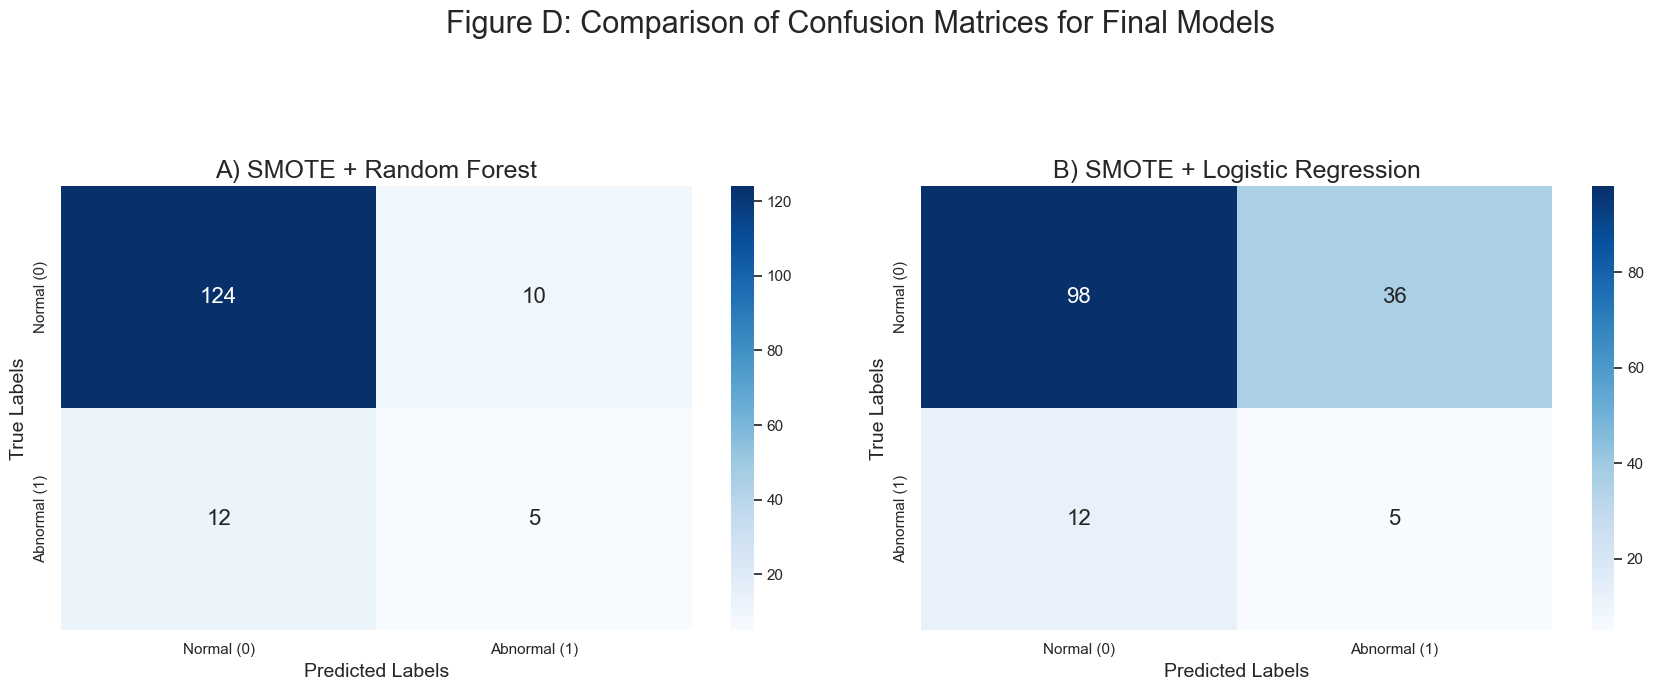

In [8]:
# ======================================================================
# "天秤行动" 最终环节: 混淆矩阵对比图生成 (独立运行)
# ======================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
try:
    from imblearn.over_sampling import SMOTE
except ImportError:
    print("⚠️ [警告] imblearn库未安装。SMOTE方案将不可用，只会生成一个混淆矩阵。")
    SMOTE = None

print("--- 启动: 问题四 混淆矩阵对比图生成 ---")

# --- 辅助绘图函数 ---
def plot_confusion_matrix_enhanced(cm, display_labels, title='Confusion Matrix', ax=None):
    """绘制增强版混淆矩阵，可以指定绘制的子图位置。"""
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=display_labels, 
                yticklabels=display_labels, 
                ax=ax, annot_kws={"size": 16})
    ax.set_title(title, fontsize=18)
    ax.set_xlabel('Predicted Labels', fontsize=14)
    ax.set_ylabel('True Labels', fontsize=14)

try:
    # --- 步骤 1: 独立加载并准备最终版女胎数据 ---
    
    # a. 加载我们在“净化行动V3.0”中产出的最终数据
    data_female = pd.read_csv('cleaned_female_for_modeling_v3.0.csv')
    
    # b. 定义特征和目标
    feature_cols = data_female.columns.drop('Is_Abnormal').tolist()
    target_col = 'Is_Abnormal'
    
    X = data_female[feature_cols]
    y = data_female[target_col]

    # c. 一次性划分数据集
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42, stratify=y
    )
    print("✅ 数据加载与划分完成。")
    
    # --- 步骤 2: 生成两个核心模型的混淆矩阵 ---
    
    if SMOTE:
        # 准备两个并排的子图
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
        cm_display_labels = ['Normal (0)', 'Abnormal (1)']
        
        # a. 训练并绘制方案B (SMOTE + RF)
        smote = SMOTE(random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
        model_B = RandomForestClassifier(random_state=42).fit(X_train_res, y_train_res)
        y_pred_B = model_B.predict(X_test)
        cm_B = confusion_matrix(y_test, y_pred_B, labels=[0, 1])
        plot_confusion_matrix_enhanced(cm_B, cm_display_labels, title='A) SMOTE + Random Forest', ax=ax1)
        print("✅ 方案B (SMOTE + RF) 混淆矩阵已生成。")

        # b. 训练并绘制方案C (SMOTE + Logistic Regression)
        scaler = StandardScaler()
        X_train_res_scaled = scaler.fit_transform(X_train_res)
        X_test_scaled = scaler.transform(X_test)
        model_C = LogisticRegression(random_state=42, solver='liblinear').fit(X_train_res_scaled, y_train_res)
        y_pred_C = model_C.predict(X_test_scaled)
        cm_C = confusion_matrix(y_test, y_pred_C, labels=[0, 1])
        plot_confusion_matrix_enhanced(cm_C, cm_display_labels, title='B) SMOTE + Logistic Regression', ax=ax2)
        print("✅ 方案C (Logistic Regression) 混淆矩阵已生成。")
        
        fig.suptitle('Figure D: Comparison of Confusion Matrices for Final Models', fontsize=22, y=1.03)
        plt.tight_layout(pad=3.0)

        # c. 导出合并后的图表
        output_filename = 'figure_q4_confusion_matrix_comparison.png'
        plt.savefig(output_filename, dpi=300, bbox_inches='tight')
        print(f"\n💾 [导出成功] 对比图已成功保存为 '{output_filename}'。")
        plt.show()

    else:
        # 如果imblearn未安装，只生成逻辑回归的图
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        model_C_solo = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced').fit(X_train_scaled, y_train)
        y_pred_C_solo = model_C_solo.predict(X_test_scaled)
        cm_C_solo = confusion_matrix(y_test, y_pred_C_solo, labels=[0, 1])
        plot_confusion_matrix_enhanced(cm_C_solo, ['Normal (0)', 'Abnormal (1)'], title='Confusion Matrix for Logistic Regression')
        plt.savefig('figure_q4_confusion_matrix_logreg.png', dpi=300, bbox_inches='tight')
        print("✅ figure_q4_confusion_matrix_logreg.png 已导出。")
        plt.show()
        
except FileNotFoundError:
    print("\n❌ [错误] 找不到数据文件 'cleaned_female_for_modeling_v3.0.csv'。请确保已完成之前的EDA步骤。")
except Exception as e:
    import traceback
    print(f"\n❌ 发生未知错误: {e}")
    traceback.print_exc()